# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
from os import path as pth

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Par soucis d'efficacité et de pérennité, nous utilisons une copie locale de ces données. Dans le cas où ce fichier n'existerait pas ou plus, nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Ces données sont ensuite sauvegardées à l'emplacement défini pour pouvoir être réutilisées par la suite.

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [3]:
file_path='DonneesGrippeMOOC.csv'

if pth.isfile(file_path)==0:
    raw_data = pd.read_csv(data_url, skiprows=1)
    df=pd.DataFrame(raw_data,columns=['week','indicator','inc','inc_low','inc_up','inc100','inc100_low','inc100_up','geo_insee','geo_name'])
    df.to_csv(file_path,index=False)

raw_data = pd.read_csv(file_path)

raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202120          7   8003     4590   11416      12           7   
1     202119          7   6654     4370    8938      10           7   
2     202118          7   3912     2110    5714       6           3   
3     202117          7   4686     2878    6494       7           4   
4     202116          7   4780     2891    6669       7           4   
5     202115          7  11215     7627   14803      17          12   
6     202114          7  11197     7994   14400      17          12   
7     202113          7   9714     6289   13139      15          10   
8     202112          7  11520     8415   14625      17          12   
9     202111          7   9386     6678   12094      14          10   
10    202110          7   9056     6452   11660      14          10   
11    202109          7  10988     7938   14038      17          12   
12    202108          7  11281     8361   14201      17          13   
13    202107          7  13561    10315   16807      21          16   
14    202106          7  13401     9810   16992      20          15   
15    202105          7  12210     8988   15432      18          13   
16    202104          7  12026     8826   15226      18          13   
17    202103          7   8913     6375   11451      13           9   
18    202102          7   7795     5430   10160      12           8   
19    202101          7  10525     7750   13300      16          12   
20    202053          7  11978     8406   15550      18          13   
21    202052          7  12012     8285   15739      18          12   
22    202051          7  10564     7574   13554      16          11   
23    202050          7   7063     4744    9382      11           7   
24    202049          7   5026     3145    6907       8           5   
25    202048          7   6683     4312    9054      10           6   
26    202047          7   4999     2963    7035       8           5   
27    202046          7   3752     1963    5541       6           3   
28    202045          7   3696     2016    5376       6           3   
29    202044          7   4391     2375    6407       7           4   
...      ...        ...    ...      ...     ...     ...         ...   
1560  199126          7  17608    11304   23912      31          20   
1561  199125          7  16169    10700   21638      28          18   
1562  199124          7  16171    10071   22271      28          17   
1563  199123          7  11947     7671   16223      21          13   
1564  199122          7  15452     9953   20951      27          17   
1565  199121          7  14903     8975   20831      26          16   
1566  199120          7  19053    12742   25364      34          23   
1567  199119          7  16739    11246   22232      29          19   
1568  199118          7  21385    13882   28888      38          25   
1569  199117          7  13462     8877   18047      24          16   
1570  199116          7  14857    10068   19646      26          18   
1571  199115          7  13975     9781   18169      25          18   
1572  199114          7  12265     7684   16846      22          14   
1573  199113          7   9567     6041   13093      17          11   
1574  199112          7  10864     7331   14397      19          13   
1575  199111          7  15574    11184   19964      27          19   
1576  199110          7  16643    11372   21914      29          20   
1577  199109          7  13741     8780   18702      24          15   
1578  199108          7  13289     8813   17765      23          15   
1579  199107          7  12337     8077   16597      22          15   
1580  199106          7  10877     7013   14741      19          12   
1581  199105          7  10442     6544   14340      18          11   
1582  199104          7   7913     4563   11263      14           8   
1583  199103          7  15387    10484   20290      27          18   
1584  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? Non

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nous utiliserons donc l'ensemble des données disponibles pour la suite de l'étude

In [6]:
data=raw_data

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [7]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [8]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste pour l'ensemble des données.

In [9]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

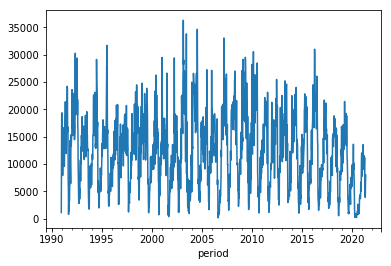

In [10]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des creux en été. Une réduction de l'amplitude et de la largeur du pic de 2020 et 2021 pourraient être attribués aux effets des confinements liés à la COVID-19.

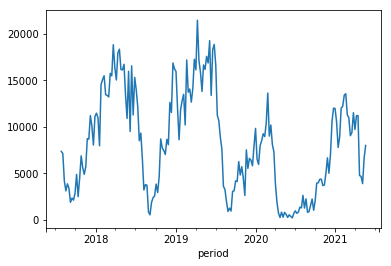

In [11]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er septembre de l'année $N$ au
1er septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er septembre de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er septembre.

Encore un petit détail: les données commencent en décembre 1990, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [12]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [14]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

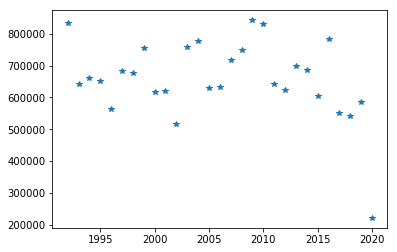

In [15]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [16]:
yearly_incidence.sort_values()

2020    221186
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Enfin, un histogramme montre bien que la varicelle est une maladie touchant la population de manière chronique, sans vraiment présenter de forte épidémies se démarquant de la tendance moyenne. Les effets du confinement liés à la COVID-19 sont bien visibles puisque l'année 2020 voit l'incidence de la varicelle être réduite d'environ un facteur 3 vis à vis de l'incidence moyenne mesurée sur les 30 dernières années. 

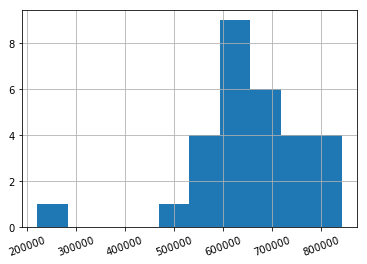

In [17]:
yearly_incidence.hist(xrot=20)